---
<h1 align='center' style="color:green"> Fraud Detection Model of Bank Transactions</h1>

---
### Goal
    The goal of this project is to recognize fraudulentBank Transactions.
    The ML Model neeed to classify bank transactions into legitimate and fraudulent.


Steps:

  * Step 1: Import  Libraries and Data Set:
  * Step 2: Processing data
  * Step 3: Exploratory Analysis
  * Step 4: Feature selection and Data split
  * Step 5: Building classification models    

      *   Decision Tree
      *   K - Nearest Neighbor
      *   Logistic Regression
      *   SVM
      *   Random Forest Tree
      *   XGBoost
  * Step 6:Evaluation



## Step 1 - Import Libraries and Data Set:
in addition to the scikit-learn library whhich we use to perform the classification analysis, we also use several other packages and modules:

- **Pandas**:used for data structures and operations for manipulating numerical tables
- **Numpy**: used for numerical analysis
- **matplotlib.pyplot**: used for plotting data
- **seaborn**: used for data visualization (used on top of matplotlib library)
- **sklearn**: used in our kernel to split the set into a training and a testing set, to create the model, and to visualize the results.

We import the data from a csv file, and we load it into a pandas DataFrame object.**bold text**

### A. Importing Necessary Libraries

In [1]:
# import the necessary packages
import pandas as pd #data processing
import numpy as np #working with arrays
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
from termcolor import colored as cl  #text customization
import itertools #advanced functionality on iterators

### B. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.


[Download the dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) that will be used to train a transaction classifier. Unzip it and put the content (creditcard.csv) under folder data


In [26]:
# Load the dataset from the csv file using pandas
df = pd.read_csv('sample_data/Fraud.csv')
print(df.shape)
print(df.head())

(842043, 11)
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [27]:
# Start exploring the dataset
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [28]:
# take random rows for data
df = df.sample(frac=0.1, random_state = 1)  # frac=0.1 means choose random float value
df.head()
# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5500,5,CASH_OUT,105095.10,C1833239242,0.0,0.0,C1394526584,169941.73,618730.52,0.0,0.0
428693,18,CASH_OUT,84168.71,C1973667990,30908.0,0.0,C943081577,0.00,84168.71,0.0,0.0
143388,11,CASH_OUT,530398.99,C884406700,907.0,0.0,C1142708145,18690.00,822689.20,0.0,0.0
59443,9,CASH_OUT,300820.09,C1361710513,62003.0,0.0,C574367055,0.00,1034383.06,0.0,0.0
464983,19,PAYMENT,4987.70,C46539508,0.0,0.0,M670802739,0.00,0.00,0.0,0.0


In [29]:
# Print the shape of the data
print(df.shape)

(84204, 11)


In [30]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  84204.000000  8.420400e+04   8.420400e+04    8.420400e+04   
mean      21.782101  1.635298e+05   8.817713e+05    9.021575e+05   
std       10.909849  2.648033e+05   2.983074e+06    3.019516e+06   
min        1.000000  7.300000e-01   0.000000e+00    0.000000e+00   
25%       13.000000  1.293846e+04   0.000000e+00    0.000000e+00   
50%       18.000000  8.036762e+04   1.679750e+04    0.000000e+00   
75%       34.000000  2.205496e+05   1.501392e+05    1.925631e+05   
max       41.000000  9.465989e+06   3.840000e+07    3.840000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    8.420400e+04    8.420400e+04  84204.000000         84204.0  
mean     9.899638e+05    1.141838e+06      0.000523             0.0  
std      2.319248e+06    2.459230e+06      0.022853             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

## Step-2: Data Processing
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

### Missing Data: Handle NaN Values
    Three way to Handle NaN:1. Drop row or 2. fill with '0' or fill with mean and median
    Check for missing values in your dataset and decide on an appropriate strategy for handling them (e.g., imputation or removal).

In [31]:
df.isnull().values.any()

False

##### Intuition
- No null values in data.

In [32]:
df.isna().sum()  # no null value in any columns
# data= data.dropna()
# data.shape


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Rename column to remove white space and other string

In [33]:
# Is there any cateorigical Value are present? If yes, then convert to Neumeric Value
obj_cols = df.loc[:, df.dtypes == object]
obj_cols

,type,nameOrig,nameDest
5500,CASH_OUT,C1833239242,C1394526584
428693,CASH_OUT,C1973667990,C943081577
143388,CASH_OUT,C884406700,C1142708145
59443,CASH_OUT,C1361710513,C574367055
464983,PAYMENT,C46539508,M670802739
...,...,...,...
512910,CASH_OUT,C288091534,C1561552482
299168,CASH_IN,C2092176805,C1608008030
781587,CASH_OUT,C308535782,C1644383145
431969,CASH_IN,C294250170,C1947855146


In [34]:
from sklearn.preprocessing import LabelEncoder
Orig_le = LabelEncoder()
Dest_le= LabelEncoder()
type_le = LabelEncoder()

In [36]:
df["Orig_le"]= Orig_le.fit_transform(df["nameOrig"])
df["Dest_le"]= Dest_le.fit_transform(df["nameDest"])
df["type_le"]= type_le.fit_transform(df["type"])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Orig_le,Dest_le,type_le
5500,5,CASH_OUT,105095.10,C1833239242,0.00,0.00,C1394526584,169941.73,618730.52,0.0,0.0,36066,6847,1
428693,18,CASH_OUT,84168.71,C1973667990,30908.00,0.00,C943081577,0.00,84168.71,0.0,0.0,42100,32754,1
143388,11,CASH_OUT,530398.99,C884406700,907.00,0.00,C1142708145,18690.00,822689.20,0.0,0.0,79017,2485,1
59443,9,CASH_OUT,300820.09,C1361710513,62003.00,0.00,C574367055,0.00,1034383.06,0.0,0.0,15502,26268,1
464983,19,PAYMENT,4987.70,C46539508,0.00,0.00,M670802739,0.00,0.00,0.0,0.0,60601,56825,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512910,20,CASH_OUT,48976.93,C288091534,0.00,0.00,C1561552482,372145.07,421122.00,0.0,0.0,52878,9679,1
299168,15,CASH_IN,23301.68,C2092176805,3443570.54,3466872.22,C1608008030,136887.00,113585.32,0.0,0.0,47194,10435,0
781587,39,CASH_OUT,107835.86,C308535782,183.00,0.00,C1644383145,0.00,107835.86,0.0,0.0,53794,11064,1
431969,18,CASH_IN,200943.20,C294250170,204331.00,405274.20,C1947855146,567405.10,366461.90,0.0,0.0,53163,16481,0


In [38]:

df= df.drop(["step","type","nameOrig","nameDest","isFlaggedFraud",], axis= "columns")


KeyError: "['step', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud'] not found in axis"

In [39]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Orig_le,Dest_le,type_le
5500,105095.10,0.00,0.00,169941.73,618730.52,0.0,36066,6847,1
428693,84168.71,30908.00,0.00,0.00,84168.71,0.0,42100,32754,1
143388,530398.99,907.00,0.00,18690.00,822689.20,0.0,79017,2485,1
59443,300820.09,62003.00,0.00,0.00,1034383.06,0.0,15502,26268,1
464983,4987.70,0.00,0.00,0.00,0.00,0.0,60601,56825,3
...,...,...,...,...,...,...,...,...,...
512910,48976.93,0.00,0.00,372145.07,421122.00,0.0,52878,9679,1
299168,23301.68,3443570.54,3466872.22,136887.00,113585.32,0.0,47194,10435,0
781587,107835.86,183.00,0.00,0.00,107835.86,0.0,53794,11064,1
431969,200943.20,204331.00,405274.20,567405.10,366461.90,0.0,53163,16481,0


In [40]:
df.info()  # No null value so we start plotting

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84204 entries, 5500 to 337909
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          84204 non-null  float64
 1   oldbalanceOrg   84204 non-null  float64
 2   newbalanceOrig  84204 non-null  float64
 3   oldbalanceDest  84204 non-null  float64
 4   newbalanceDest  84204 non-null  float64
 5   isFraud         84204 non-null  float64
 6   Orig_le         84204 non-null  int64  
 7   Dest_le         84204 non-null  int64  
 8   type_le         84204 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 6.4 MB


## Step 3-Exploratory Data Analysis

### A. Data Visualization

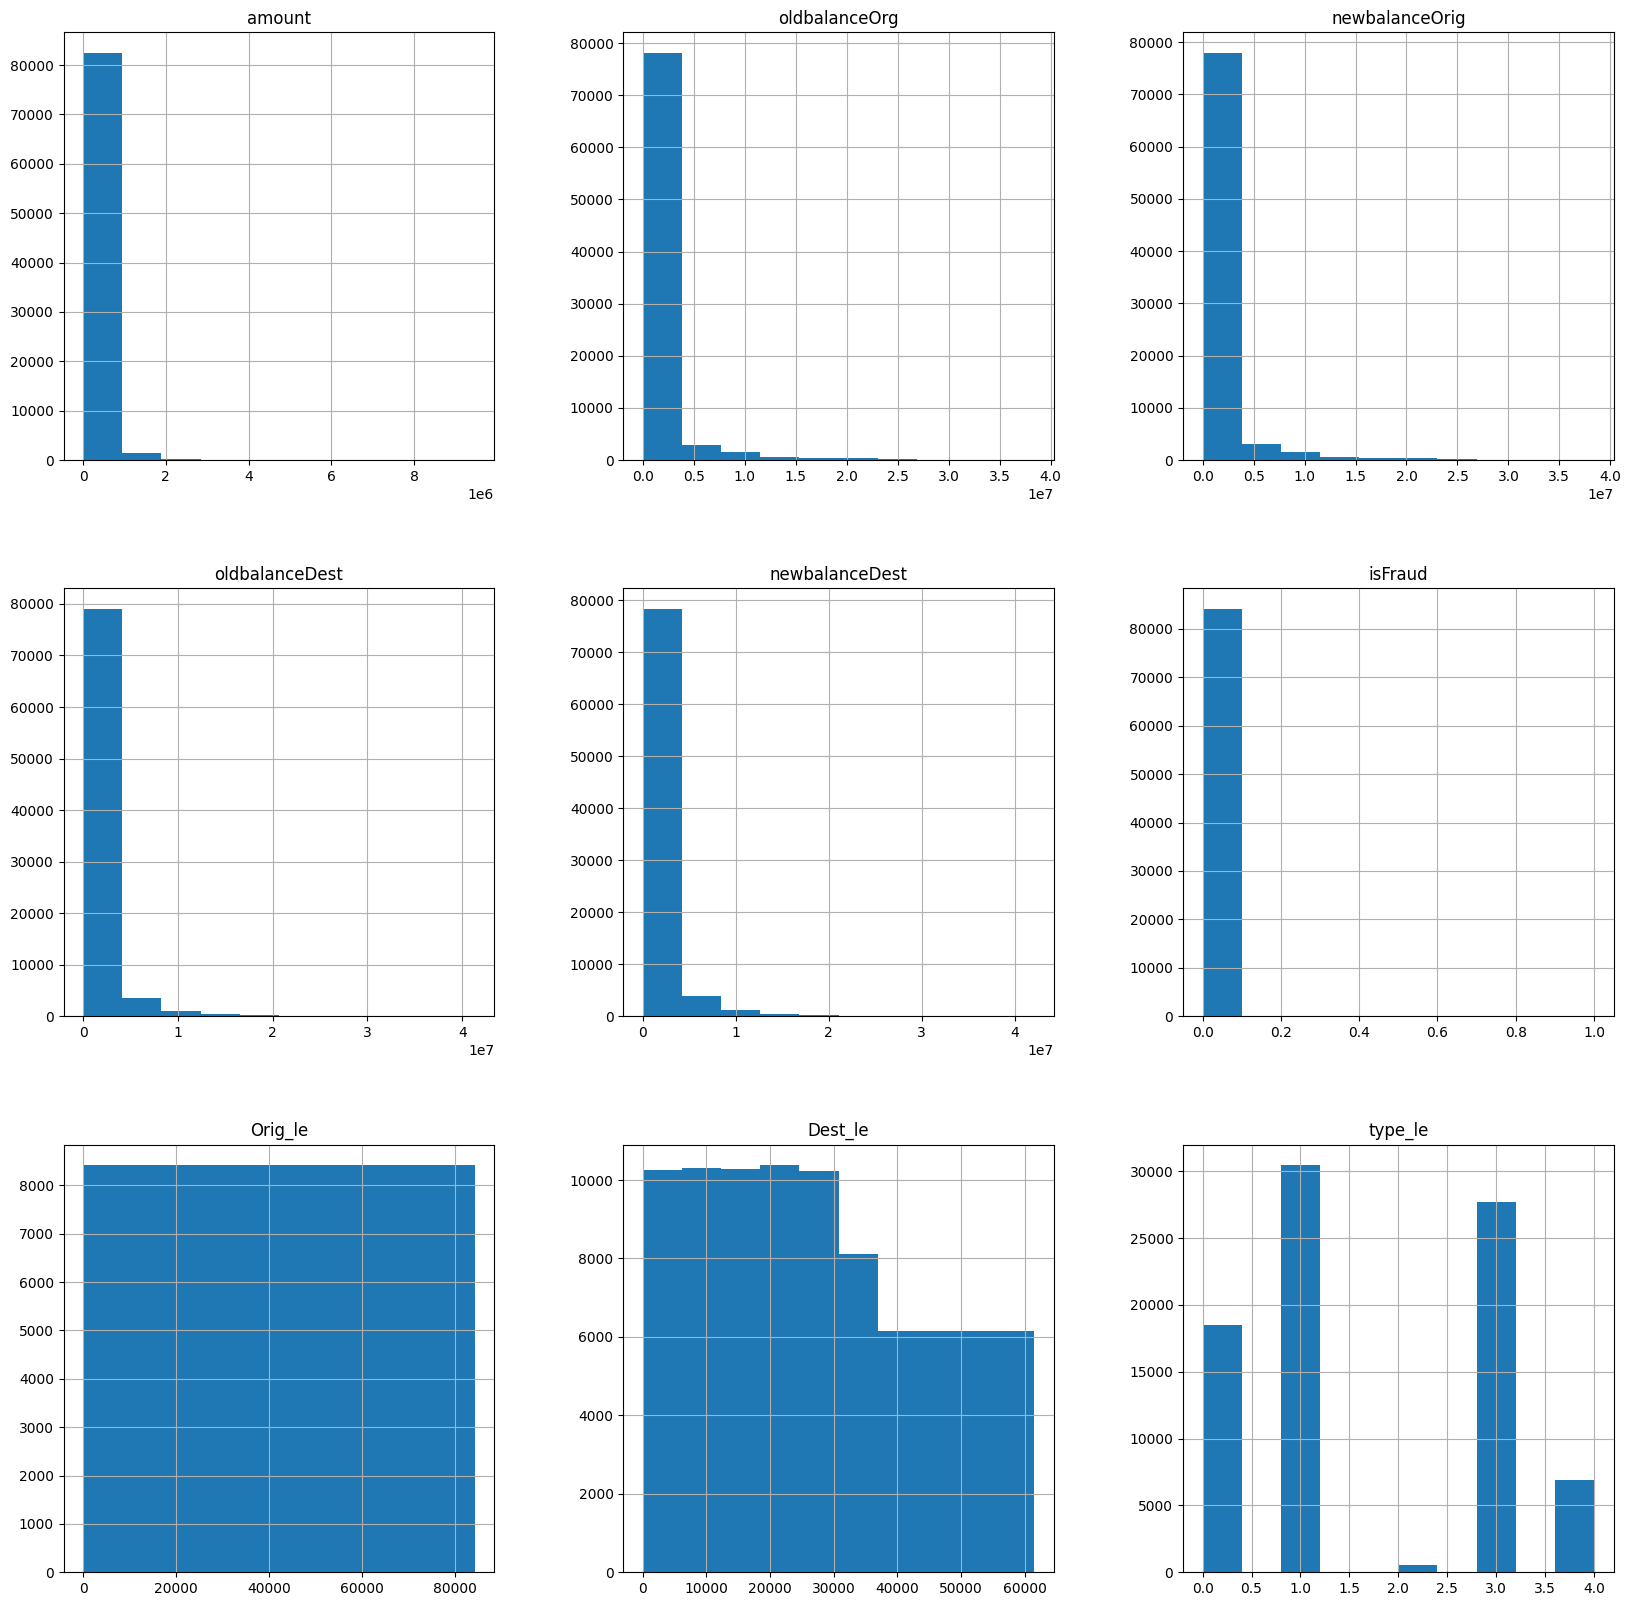

In [41]:
# Plot histograms of each parameter
df.hist(figsize = (20, 20))
plt.show()

## Analysis of Target Variable

### Number of Genuine and Fraud Transactions

In [42]:
# Determine number of fraud cases in dataset

Fraud = df[df['isFraud'] == 1]
Valid = df[df['isFraud'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases       : {}'.format(len(df[df['isFraud'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['isFraud'] == 0])))

0.0005228136882129277
Fraud Cases       : 44
Valid Transactions: 84160


In [43]:
perc_genuine = (len(Valid)/(len(Valid)+len(Fraud)))*100
print('Number of Genuine Transactions = {} and the percentage of genuine transactions = {:.3f} %'.format(len(Valid),perc_genuine))
perc_fraud = (len(Fraud)/(len(Valid)+len(Fraud)))*100
print('Number of fraud Transactions = {} and the percentage of fraud transactions = {:.3f} %'.format(len(Fraud),perc_fraud))

Number of Genuine Transactions = 84160 and the percentage of genuine transactions = 99.948 %
Number of fraud Transactions = 44 and the percentage of fraud transactions = 0.052 %


### Histogram of target variable

> Indented block


<Axes: xlabel='isFraud', ylabel='count'>

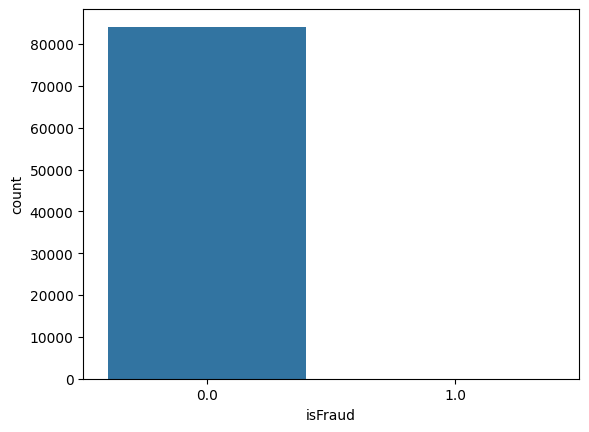

In [44]:
sns.countplot(data=df, x='isFraud')

### Correlation
Visualization of correlation of all features of dataset

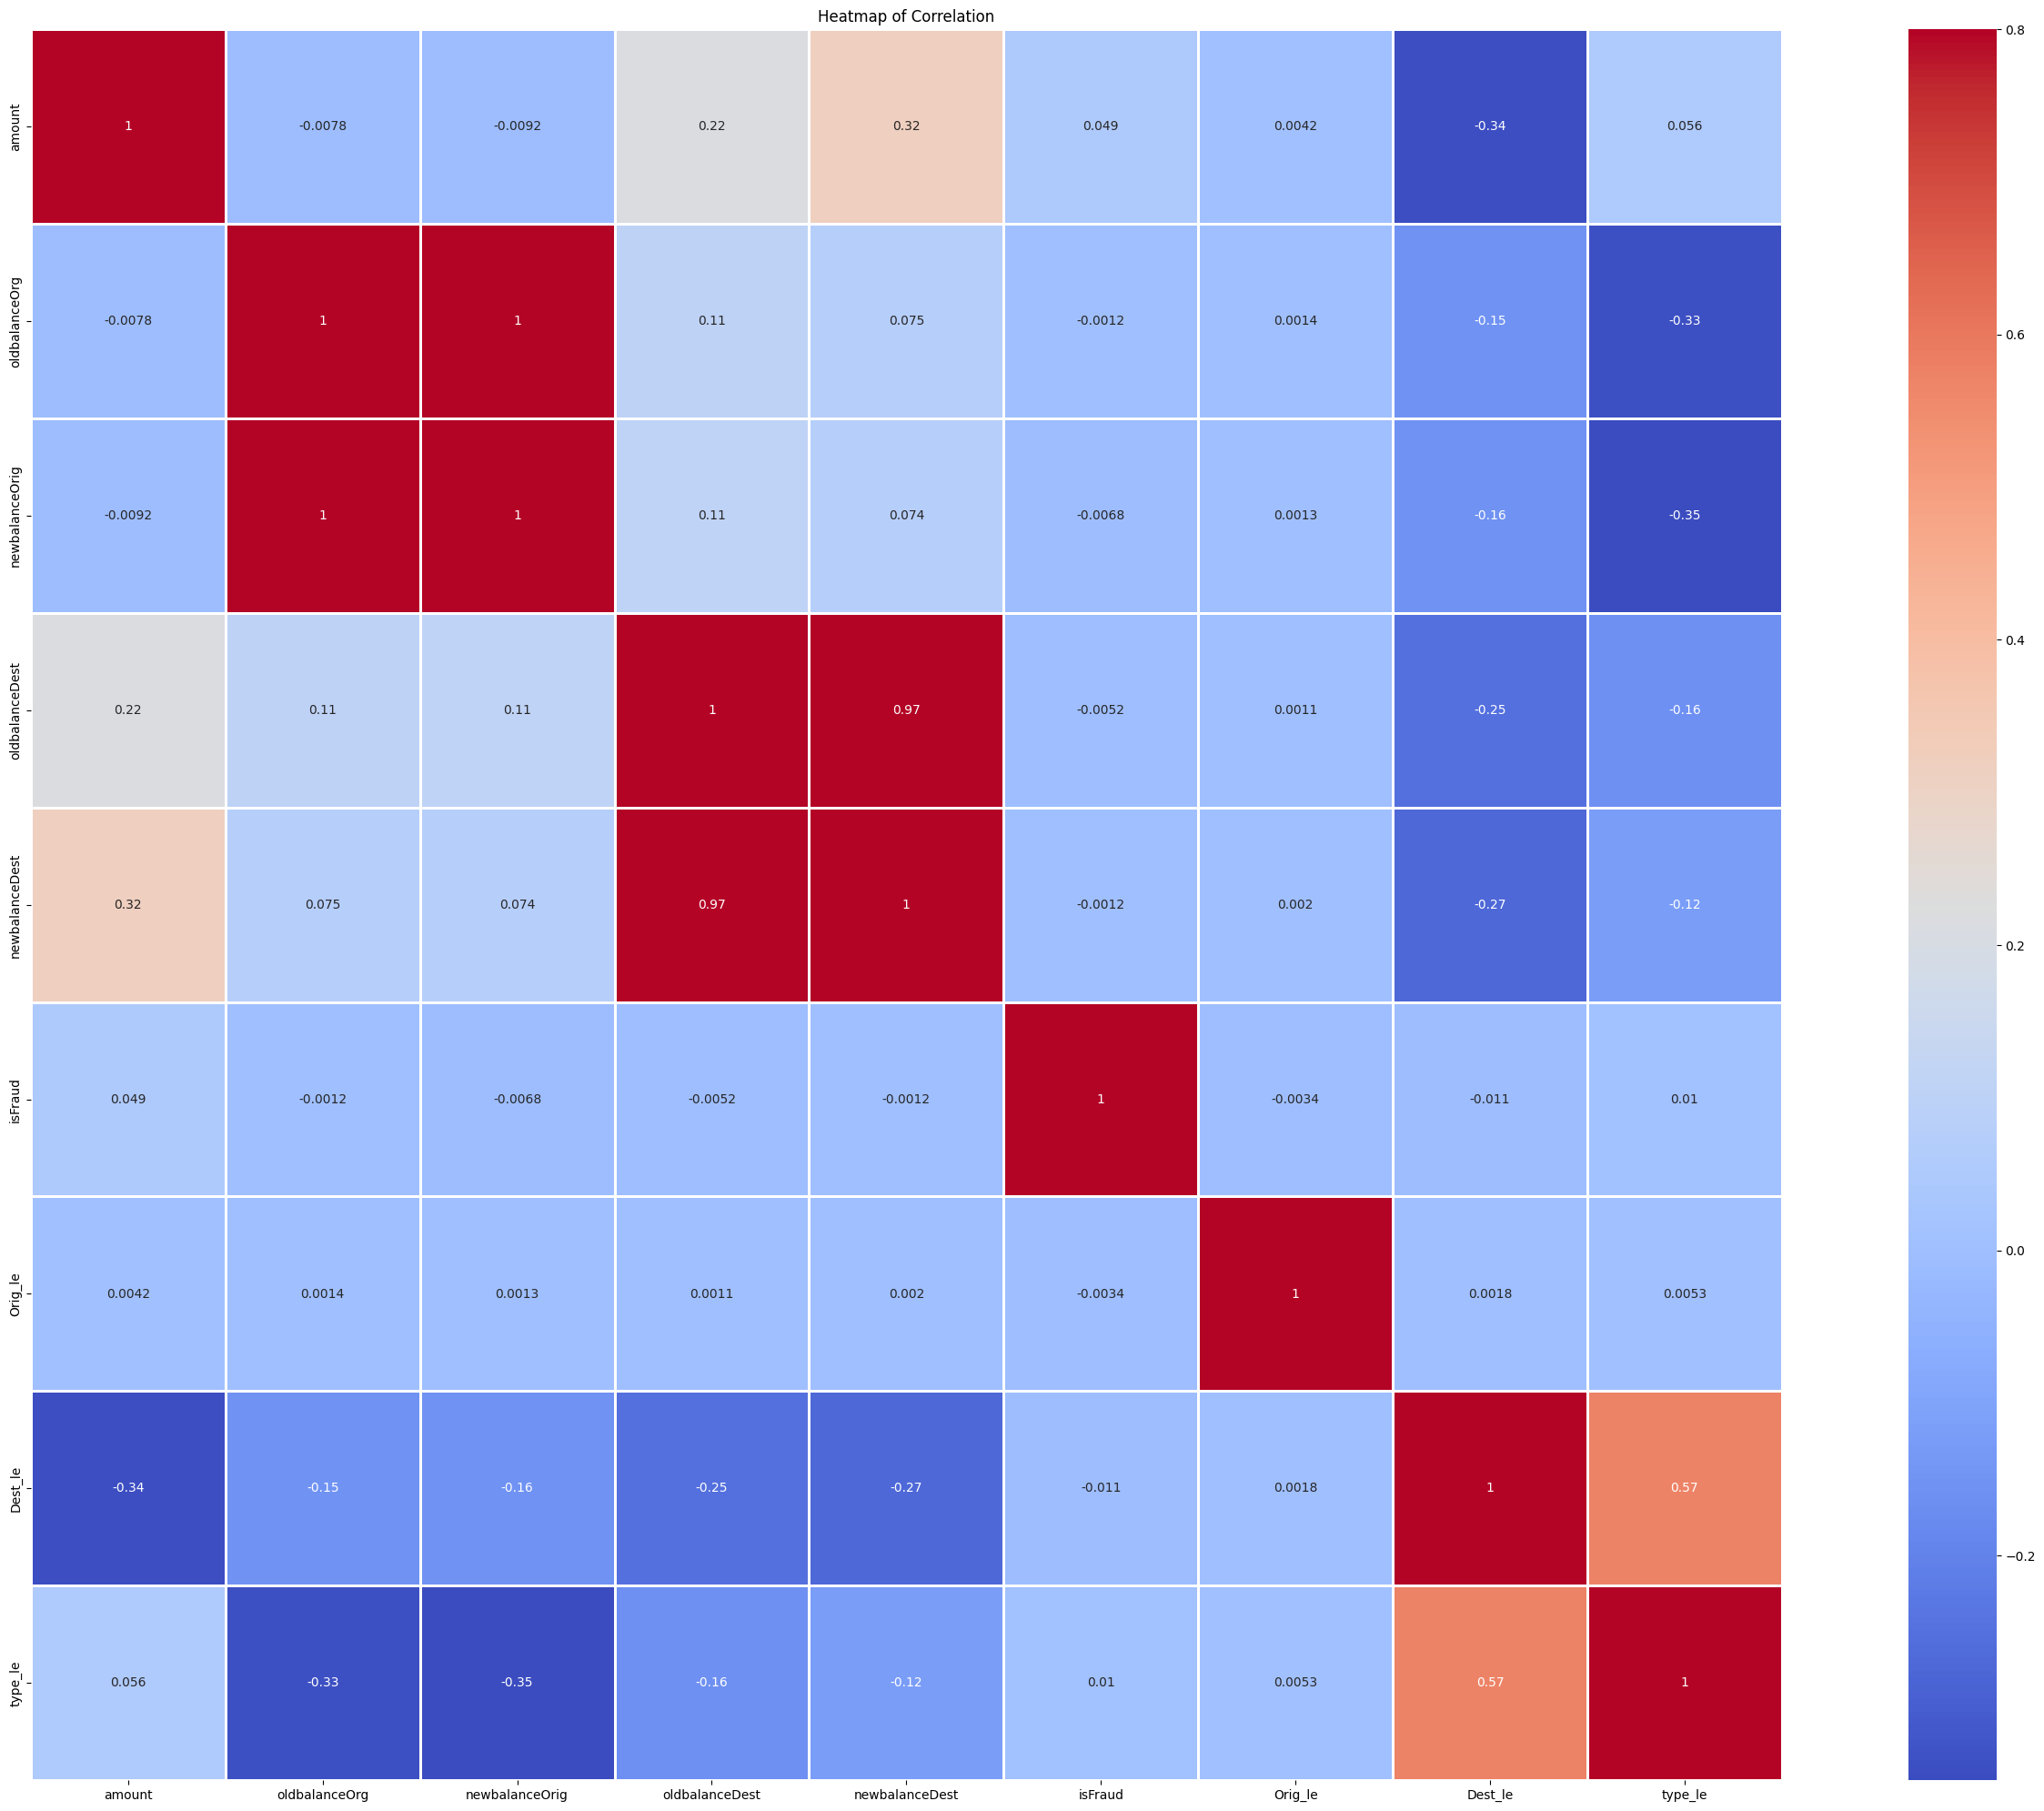

In [48]:
## Correlation matrix
corrmat=df.corr()
fig=plt.figure(figsize=(36,25))
sns.heatmap(corrmat, vmax = .8, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.title('Heatmap of Correlation')
plt.show()
#Data not correlated, because parameters were derived from PCA

<ipython-input-49-426bf24de2b3>:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
<ipython-input-49-426bf24de2b3>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
<ipython-input-49-426bf24de2b3>:9: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(Valid[column], bw = 0.4, label = "Non Fraudulent", shade=True, co

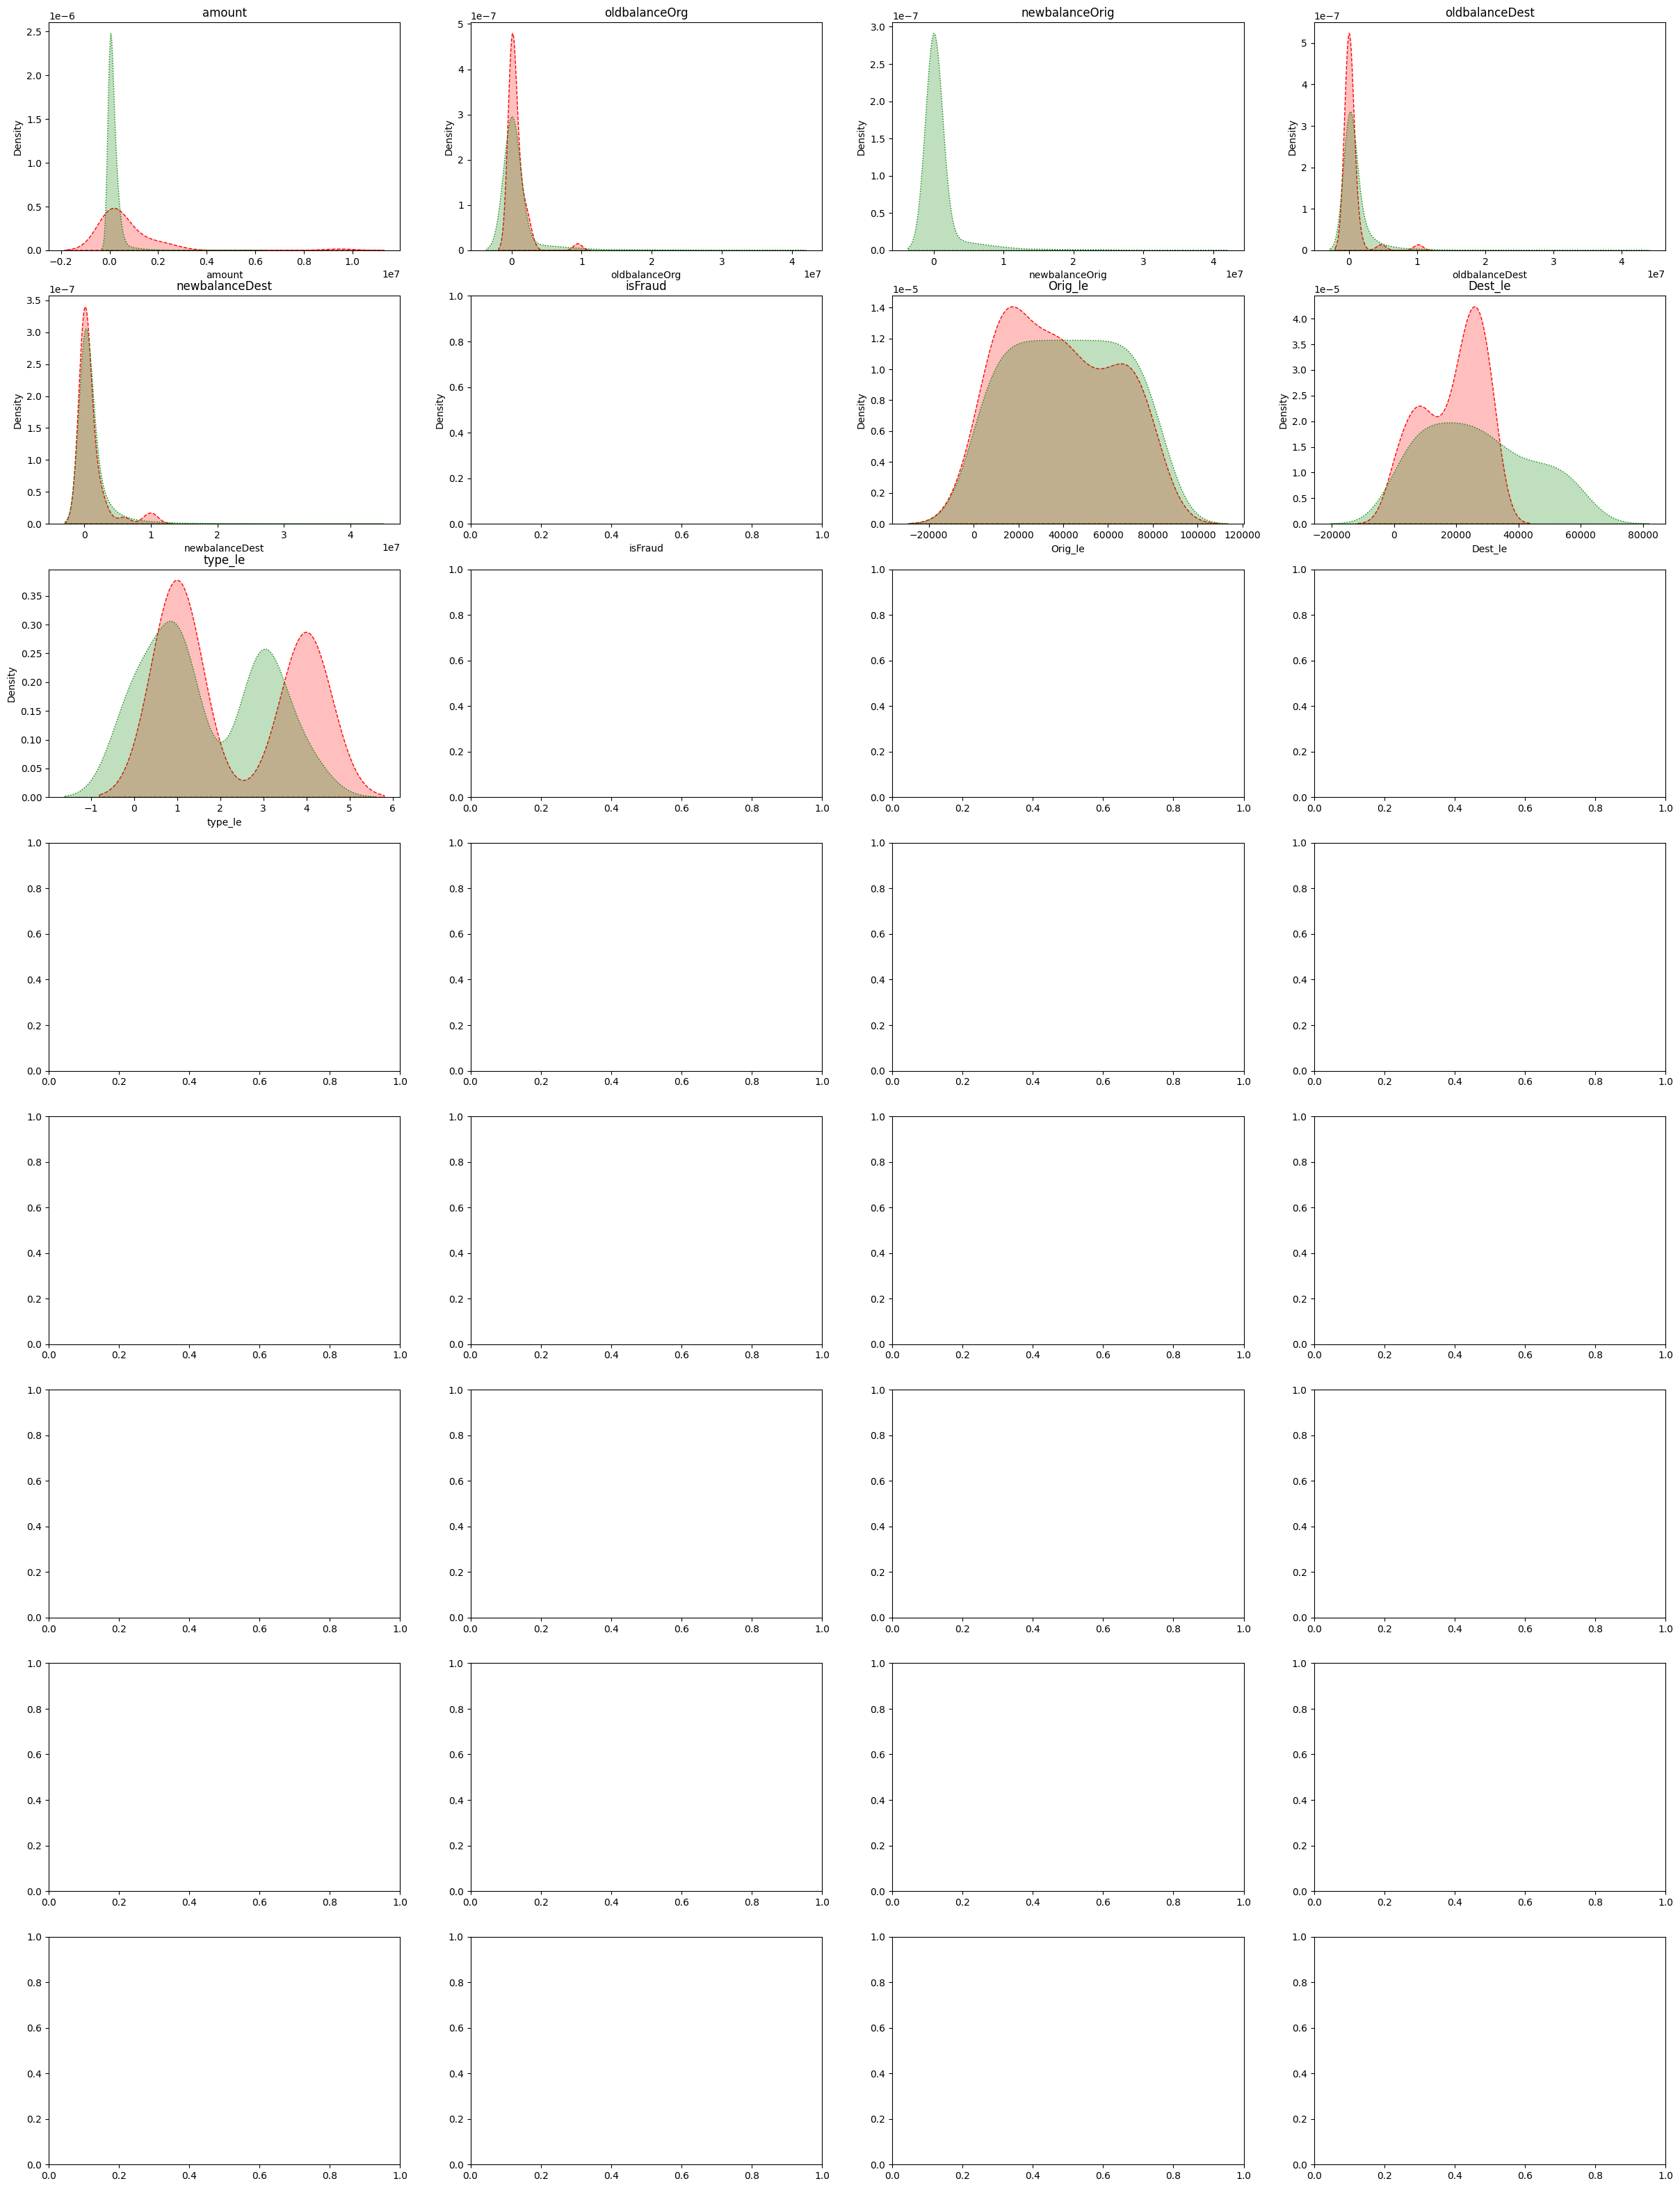

In [49]:
#Data not correlated, because parameters were derived from PCA
#Visualize column contents by fraud/legit to see if column adds value
columns = df.columns.values
counter = 1
fig, ax = plt.subplots(8,4,figsize=(30,40))
for column in columns:
    plt.subplot(8,4,counter)
    sns.kdeplot(Fraud[column], bw = 0.4, label = "Fraudulent", shade=True, color="r", linestyle="--")
    sns.kdeplot(Valid[column], bw = 0.4, label = "Non Fraudulent", shade=True, color= "g", linestyle=":")
    plt.title(column, fontsize=12)
    counter=counter + 1
plt.show();

 ## Step 4- Feature selection and Data split

In [51]:
from sklearn.preprocessing import StandardScaler #data normalisation
from sklearn.model_selection import train_test_split #data split


###  DataSplit
This step involves definining out dependent and Independent variables X and Y respectively.
This would help us to split the data into a **training** set and **testing** set which is used for modelling and evaluating

Use the **train_test_split** algorithm from the **sklearn.model_selection** module to split data

* The X data used for training would be **x_train** and Y data used for training **Y_train** and the same for **test**. This is known as out of sample testing

* We would run the x_train and y_train data through our Machine Learning Algorithm to generate a model

* x_test values would be tested against the model and checked to see if y_test values are obtained

In [52]:
#Data Split

#X which would be all values within data frame except the 'Class' column
X = df.drop('isFraud', axis = 1).values

#y which are all values within the class columns
y = df['isFraud'].values

#test_size means 20% of our data is going to be used a means for testing our model generated from the algorithm.
#This means 80% of our data is going to be used to train our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples: ', attrs =  ['bold']), X_train[:1])
print(cl('X_test samples: ', attrs=['bold']), X_test[0:1])
print(cl('y_train samples: ', attrs=['bold']), y_train[0:20])
print(cl('y_test samples: ', attrs=['bold']), y_test[0:20])

X_train samples:  [[1.14036720e+05 0.00000000e+00 0.00000000e+00 2.42627644e+06
  2.54031316e+06 4.68710000e+04 2.63820000e+04 1.00000000e+00]]
X_test samples:  [[1.9487064e+05 1.8800000e+02 0.0000000e+00 5.0238135e+05 6.9725200e+05
  2.4963000e+04 1.1725000e+04 1.0000000e+00]]
y_train samples:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_test samples:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Print shapes
print("X shape : ",X.shape)
print("Y shape : ",y.shape)
print("X Train shape : ",X_train.shape)
print("X Test shape : ",X_test.shape)
print("Y train shape : ",y_train.shape)
print("Y test shape : ",y_test.shape)

X shape :  (28481, 30)
Y shape :  (28481,)
X Train shape :  (22784, 30)
X Test shape :  (5697, 30)
Y train shape :  (22784,)
Y test shape :  (5697,)


## Step -5: Building classification models and Evaluting :

* Decision Tree
* K-Nearest Neighbors(KNN)
* Logistic Regression
* Support Vector Machine(SVM)
* Random Forest
* XGBoost

This involbs 3 steps

* A. Define a Model
* B. Train and predict the Model:
* C. Evaluate the performance of the Model:

In [53]:
#classifiers
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.linear_model import LogisticRegression #Logistic regression algorithm
from sklearn.svm import SVC #SVM algorithm
from sklearn.ensemble import RandomForestClassifier #Random forest tree algorithm
from xgboost import XGBClassifier #XGBoost algorithm
from sklearn.ensemble import AdaBoostClassifier # Adaboost classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier

#evaluative modules
from sklearn.metrics import classification_report, confusion_matrix #evaluation metric
from sklearn.metrics import accuracy_score #evaluation metric
from sklearn.metrics import f1_score # evaluation metric

### 1. Naive bayes Classifier

In [54]:
# Define the model
model_nb=GaussianNB()

# Train the model
model_nb.fit(X_train,y_train)

# Predictions on the test set
y_pred_nb=model_nb.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_nb))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_nb))
print("Accuracy score:",accuracy_score(y_test,y_pred_nb))

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.58      0.74     16830
         1.0       0.00      1.00      0.00        11

    accuracy                           0.58     16841
   macro avg       0.50      0.79      0.37     16841
weighted avg       1.00      0.58      0.73     16841

Confusion matrix:
 [[9781 7049]
 [   0   11]]
Accuracy score: 0.5814381568790452


### 2. Support vector Classifier

In [68]:
# Define the model
model_svc=SVC()

# Train the model
model_svc.fit(X_train,y_train)

# Predictions on the test set
y_pred_svc=model_svc.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_svc))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_svc))
print("Accuracy score:",accuracy_score(y_test,y_pred_svc))


Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       0.00      0.00      0.00        11

    accuracy                           1.00     16841
   macro avg       0.50      0.50      0.50     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16830     0]
 [   11     0]]
Accuracy score: 0.999346832135859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3. K-Nearest Neighbours
#### set the k value which is the number of close neighbours we will use to classify an 'unclassified or test' data point
'''
    An odd number is used so a decision is easily determined after Eucleadian distances have been calculated.
    If even numbers are used and the distances come out to be
    same or similar, it will be hard to tell which class the test data point belongs to
'''
k = 5
#### knn KNN classifier instance which k = 5


```
# This is formatted as code
```



In [56]:
# Define the model
model_knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=1)

# Train the model
model_knn.fit(X_train,y_train)

# Predictions on the test set
y_pred_knn=model_knn.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_knn))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))
print("Accuracy score:",accuracy_score(y_test,y_pred_knn))


Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       0.00      0.00      0.00        11

    accuracy                           1.00     16841
   macro avg       0.50      0.50      0.50     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16830     0]
 [   11     0]]
Accuracy score: 0.999346832135859


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Logistic Regression

In [57]:

# Define the model
model_lr=LogisticRegression(random_state=1,penalty="l2")

# Train the model
model_lr.fit(X_train,y_train)

# Predictions on the test set
y_pred_lr=model_lr.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_lr))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_lr))
print("Accuracy score:",accuracy_score(y_test,y_pred_lr))


Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       0.67      0.18      0.29        11

    accuracy                           1.00     16841
   macro avg       0.83      0.59      0.64     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16829     1]
 [    9     2]]
Accuracy score: 0.999406211032599


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Decision Tree
#### The loss function used is 'entropy' which determines when to stop the splitting of the tree
#### Max_depth of 4 means the tree will split 4 times


In [58]:

# Define the model
model_dt=DecisionTreeClassifier(max_depth=4, criterion = 'entropy')

# Train the model
model_dt.fit(X_train,y_train)

# Predictions on the test set
y_pred_dt=model_dt.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_dt))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_dt))
print("Accuracy score:",accuracy_score(y_test,y_pred_dt))

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       0.44      0.36      0.40        11

    accuracy                           1.00     16841
   macro avg       0.72      0.68      0.70     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16825     5]
 [    7     4]]
Accuracy score: 0.9992874532391188


### 6. Random Forest

In [59]:

# Define the model
model_rf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)

# Train the model
model_rf.fit(X_train,y_train)

# Predictions on the test set
y_pred_rf=model_rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_rf))
print("Accuracy score:",accuracy_score(y_test,y_pred_rf))

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       1.00      0.18      0.31        11

    accuracy                           1.00     16841
   macro avg       1.00      0.59      0.65     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16830     0]
 [    9     2]]
Accuracy score: 0.9994655899293391


### 7. Adaboost classifier

In [60]:
# Define the model
model_abc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

# Train the model
model_abc.fit(X_train,y_train)

# Predictions on the test set
y_pred_abc=model_abc.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_abc))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_abc))
print("Accuracy score:",accuracy_score(y_test,y_pred_abc))

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       0.44      0.36      0.40        11

    accuracy                           1.00     16841
   macro avg       0.72      0.68      0.70     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16825     5]
 [    7     4]]
Accuracy score: 0.9992874532391188


### 8. XGB classifier

In [61]:
# Define the model
model_xgb=XGBClassifier()
# Train the model
model_xgb.fit(X_train,y_train)

# Predictions on the test set
y_pred_xgb=model_xgb.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_xgb))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_xgb))
print("Accuracy score:",accuracy_score(y_test,y_pred_xgb))

Classification report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16830
         1.0       1.00      0.27      0.43        11

    accuracy                           1.00     16841
   macro avg       1.00      0.64      0.71     16841
weighted avg       1.00      1.00      1.00     16841

Confusion matrix:
 [[16830     0]
 [    8     3]]
Accuracy score: 0.9995249688260792


In [64]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [65]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(model_xgb,param_distributions=params,scoring='roc_auc', n_jobs=-1,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [66]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [67]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Training XGBoost Classifier with best parameters
model_xgb_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

# Train the model
model_xgb_pt.fit(X_train,y_train)

# Predictions on the test set
y_pred_xgb_pt=model_xgb_pt.predict(X_test)

# Print classification report and confusion matrix
print("Classification report: \n",classification_report(y_test, y_pred_xgb_pt))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_xgb_pt))
print("Accuracy score:",accuracy_score(y_test,y_pred_xgb_pt))

Reference:

In [ ]:
https://colab.research.google.com/github/AnilNITT/Credit-Card-Fraud-Detection/blob/master/Scripts/Credit%20Card%20Fraud%20Detection.ipynb#scrollTo=vbWQSo8BG8lY
https://colab.research.google.com/drive/1NpuGXwu9Kq4juCpEn0v0hdJ4x73vmFp9?usp=sharing#scrollTo=4ieHSxHOzHuL
https://github.com/cloudacademy/fraud-detection/blob/master/README.md
https://colab.research.google.com/github/ameykasbe/credit-card-fraud-detection-on-imbalanced-dataset/blob/master/Credit%20Card%20Fraud%20Detection%20on%20Imbalanced%20Dataset.ipynb#scrollTo=Vuvck0-mHCF-
https://github.com/alidaoui/Credit-Card-Fraud-Classifier/blob/main/Credit-Card-Fraud-Classifier.ipynb